In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
train.head()


,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target)
0,2c9180975a056a64015a1e0a52e57021,Rear,195,1.02,46,45,Rear
1,2c9180975a056a64015a1e17b32171e4,Rear,203,1.09,59,54,Rear
2,2c9180975a056a64015a1de4deb16bd5,Front,26,0.96,104,108,Front
3,2c9180975a056a64015a1de4deb16bdd,Rear,199,0.81,38,47,Rear
4,2c9180975a056a64015a1de4deb16bd6,Rear,208,0.93,54,58,Rear


In [3]:
test=pd.read_csv('test.csv')
test.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight
0,2c9180975a056a64015a1e10d3f270fe,Right,67,0.63,107,169
1,2c9180975a056a64015a1de4deb16bdc,Front,16,0.88,61,69
2,2c9180975a056a64015a1e0e70ea70ce,Right,44,1.15,232,202
3,2c9180975a056a64015a1dfed0c46ec6,Right,50,1.10,137,125
4,2c9180975a056a64015a1dfed0c46ec7,Front,30,0.95,99,104


In [4]:
pd.get_dummies(train.DetectedCamera)

,Front,Left,Rear,Right
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
5,1,0,0,0
6,0,1,0,0
7,0,0,1,0
8,1,0,0,0
9,0,0,0,1


In [5]:
X=[]

In [6]:
x_orig=pd.concat((pd.get_dummies(train.DetectedCamera),train.iloc[:,2:6]),axis=1).values
x_test=pd.concat((pd.get_dummies(test.DetectedCamera),test.iloc[:,2:]),axis=1).values
y=train.iloc[:,-1].values

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


In [10]:
seed=0
from sklearn import cross_validation
val_size=0.2
x_train,x_val,y_train,y_val = cross_validation.train_test_split(x_orig, y, test_size=val_size, random_state=seed)

In [11]:
X.append(['Original',x_train,x_val])

In [12]:
ss=StandardScaler()
x_train1=ss.fit_transform(x_train)
x_val1=ss.transform(x_val)
X.append(['StandardScaler',x_train1,x_val1])

mms=MinMaxScaler()
x_train1=mms.fit_transform(x_train)
x_val1=mms.transform(x_val)
X.append(['MinMaxScaler',x_train1,x_val1])

nr=Normalizer()
x_train1=nr.fit_transform(x_train)
x_val1=nr.transform(x_val)
X.append(['Normalizer',x_train1,x_val1])


In [39]:
O=[]
from sklearn.grid_search import GridSearchCV as GSV

In [48]:
from sklearn.ensemble import RandomForestClassifier as RFC
for nature,xtrain,xval in X:
    features=x_train.shape[1]
    maxf=np.array(range(int(np.sqrt(features)),features+1))
    parameter_grid={'max_features':[5,6,7,8],'n_estimators':[20,50,100,500],'max_depth':[5,6,7,8]}
    rfc=RFC(min_samples_split=0.01,min_samples_leaf=0.01,warm_start=True)
    gs=GSV(estimator=rfc,param_grid=parameter_grid,cv=5,n_jobs=-1)
    gs.fit(x_train,y_train)
    bs=gs.best_estimator_ 
    bs.fit(x_train,y_train)
    scr=bs.score(x_val,y_val)
    print([nature,scr,bs])
    O.append([nature,scr,bs])
    
    
        

['Original', 0.95218916460958813, RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=0.01,
            min_samples_split=0.01, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=True)]
['StandardScaler', 0.95218916460958813, RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=0.01,
            min_samples_split=0.01, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=True)]
['MinMaxScaler', 0.95270884760296215, RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=8, max_leaf

In [50]:
from sklearn.ensemble import ExtraTreesClassifier as ETC
for nature,xtrain,xval in X:
    parameter_grid={'max_features':[5,6,7,8],'n_estimators':[10,20,50],'max_depth':[5,6,7,8]}
    etc=ETC(min_samples_split=0.01,min_samples_leaf=0.01,warm_start=True)
    gs=GSV(estimator=etc,param_grid=parameter_grid,cv=5,n_jobs=-1)
    gs.fit(x_train,y_train)
    bs=gs.best_estimator_ 
    bs.fit(x_train,y_train)
    scr=bs.score(x_val,y_val)
    print([nature,scr,bs])
    O.append([nature,scr,bs])
    

['Original', 0.94361439521891644, ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=8, max_features=8, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=0.01,
           min_samples_split=0.01, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=True)]
['StandardScaler', 0.94569312719241261, ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=8, max_features=8, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=0.01,
           min_samples_split=0.01, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=True)]
['MinMaxScaler', 0.9454332856957256, ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=7, max_features=8, max_leaf_nodes=None,
   

In [51]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
for nature,xtrain,xval in X:
    parameter_grid={'learning_rate':[0.05,0.1,0.2],'max_features':[5,6,7,8],'n_estimators':[10,20,50],'max_depth':[5,6,7,8]}
    gbc=GBC(min_samples_split=0.01,min_samples_leaf=0.01,warm_start=True)
    gs=GSV(estimator=gbc,param_grid=parameter_grid,cv=5,n_jobs=-1)
    gs.fit(x_train,y_train)
    bs=gs.best_estimator_ 
    bs.fit(x_train,y_train)
    scr=bs.score(x_val,y_val)
    print([nature,scr,bs])
    O.append([nature,scr,bs])

['Original', 0.96089385474860334, GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=6, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=0.01,
              min_samples_split=0.01, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=True)]
['StandardScaler', 0.95946472651682468, GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=6,
              max_features=5, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=0.01,
              min_samples_split=0.01, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=True)]
['MinMaxScaler', 0.95881512277510716, GradientBoostingClassi

In [52]:
X

[['Original',
  array([[   1.  ,    0.  ,    0.  , ...,    1.14,  117.  ,  103.  ],
         [   0.  ,    0.  ,    1.  , ...,    0.92,   35.  ,   38.  ],
         [   1.  ,    0.  ,    0.  , ...,    0.96,   94.  ,   98.  ],
         ..., 
         [   0.  ,    0.  ,    1.  , ...,    1.13,   72.  ,   64.  ],
         [   1.  ,    0.  ,    0.  , ...,    1.04,   83.  ,   80.  ],
         [   1.  ,    0.  ,    0.  , ...,    0.9 ,  144.  ,  160.  ]]),
  array([[   0.  ,    0.  ,    0.  , ...,    0.71,  141.  ,  198.  ],
         [   0.  ,    1.  ,    0.  , ...,    0.74,   54.  ,   73.  ],
         [   0.  ,    0.  ,    1.  , ...,    0.98,   89.  ,   91.  ],
         ..., 
         [   0.  ,    0.  ,    0.  , ...,    1.25,  169.  ,  135.  ],
         [   0.  ,    0.  ,    0.  , ...,    0.62,   72.  ,  117.  ],
         [   0.  ,    0.  ,    0.  , ...,    0.45,   67.  ,  148.  ]])],
 ['StandardScaler',
  array([[ 1.58676542, -0.56484716, -0.50189735, ...,  1.06025929,
           0.46099754, -

In [53]:
O

[['Original',
  0.95218916460958813,
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=7, max_features=6, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=0.01,
              min_samples_split=0.01, min_weight_fraction_leaf=0.0,
              n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
              verbose=0, warm_start=True)],
 ['StandardScaler',
  0.95218916460958813,
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=7, max_features=6, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=0.01,
              min_samples_split=0.01, min_weight_fraction_leaf=0.0,
              n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
              verbose=0, warm_start=True)],
 ['MinMaxScaler',
  0.95270884760296215,
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            

In [69]:
gbc=GBC(criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='deviance', max_depth=5,
                max_features=6, max_leaf_nodes=None,
                min_impurity_split=1e-07, min_samples_leaf=0.01,
                min_samples_split=0.01, min_weight_fraction_leaf=0.0,
                n_estimators=50, presort='auto', random_state=None,
                subsample=1.0, verbose=0, warm_start=True)
gbc.fit(x_orig,y)
y_ans=gbc.predict(x_test)


In [100]:
sam=pd.read_csv('sample_submission.csv')
ans.head()

,Id,Front,Left,Rear,Right
0,2c9180975a056a64015a1e10d3f270fe,0.716639,0.037567,0.035260,0.002107
1,2c9180975a056a64015a1de4deb16bdc,0.413017,0.021556,0.015912,0.000171
2,2c9180975a056a64015a1e0e70ea70ce,0.843845,0.137644,0.042625,0.000844
3,2c9180975a056a64015a1dfed0c46ec6,0.039499,0.197816,0.086705,0.009786
4,2c9180975a056a64015a1dfed0c46ec7,0.054761,0.176938,0.097390,0.007778


In [96]:
test.Id.values.shape

(31485,)

In [103]:
ytp=gbc.predict_proba(x_test)
Ids=test.Id.values
Ids.shape=((len(ytp),1))
ans=np.concatenate((test.Id.values,ytp),axis=1)
ans=pd.DataFrame(ans)
ans.columns=sam.columns
ans.to_csv('ans1.csv',index=False)

In [57]:
gbc.score(x_orig,y)

0.96429777835520336

In [70]:
yp=gbc.predict_proba(x_orig)
print(yp[0,:])
ytrp=gbc.predict(x_orig)
print(ytrp[0])

[ 0.00381855  0.00521521  0.98632968  0.00463656]
Rear


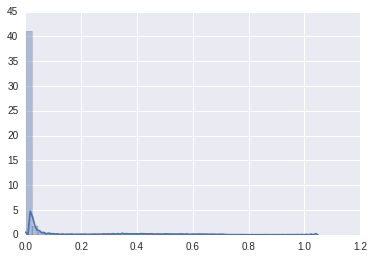

In [71]:
from sklearn.metrics import log_loss
losses=np.zeros((ytrp.shape))
lab=np.unique(ytrp)
for i in range(0,len(ytrp)):
    losses[i]=log_loss(ytrp[i:i+1],yp[i:i+1],labels=lab,normalize=False)



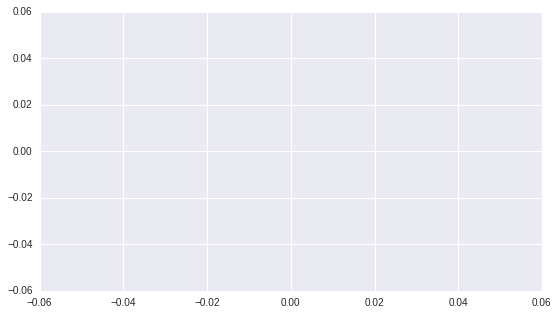

In [82]:
plt.figure(figsize=(9,5))
plt.plot(x=range(1,len(losses)+1),y=losses)
plt.show()

In [83]:
def stacking(models,x_train,y_train):
    
    

array([ 0.01376462,  0.00450785,  0.00361881, ...,  0.00433701,
        0.00455643,  0.00440016])

In [ ]:
rfc=RFC(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=7, max_features=6, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=0.01,
              min_samples_split=0.01, min_weight_fraction_leaf=0.0,
              n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
              verbose=0, warm_start=True)
rfc.fit(x_train)